In [1]:
%store -r log_recall 
%store -r log_AP
%store -r log_f1

%store -r svc_AP
%store -r svc_f1
%store -r svc_recall


%store -r rf_recall 
%store -r rf_AP
%store  -r rf_f1

%store -r xgb_recall 
%store -r xgb_AP
%store -r xgb_f1


%store -r cat


%store -r X
%store -r y

%store -r x_test
%store -r y_test


In [2]:
import pandas as pd


compare = pd.DataFrame(
       {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)

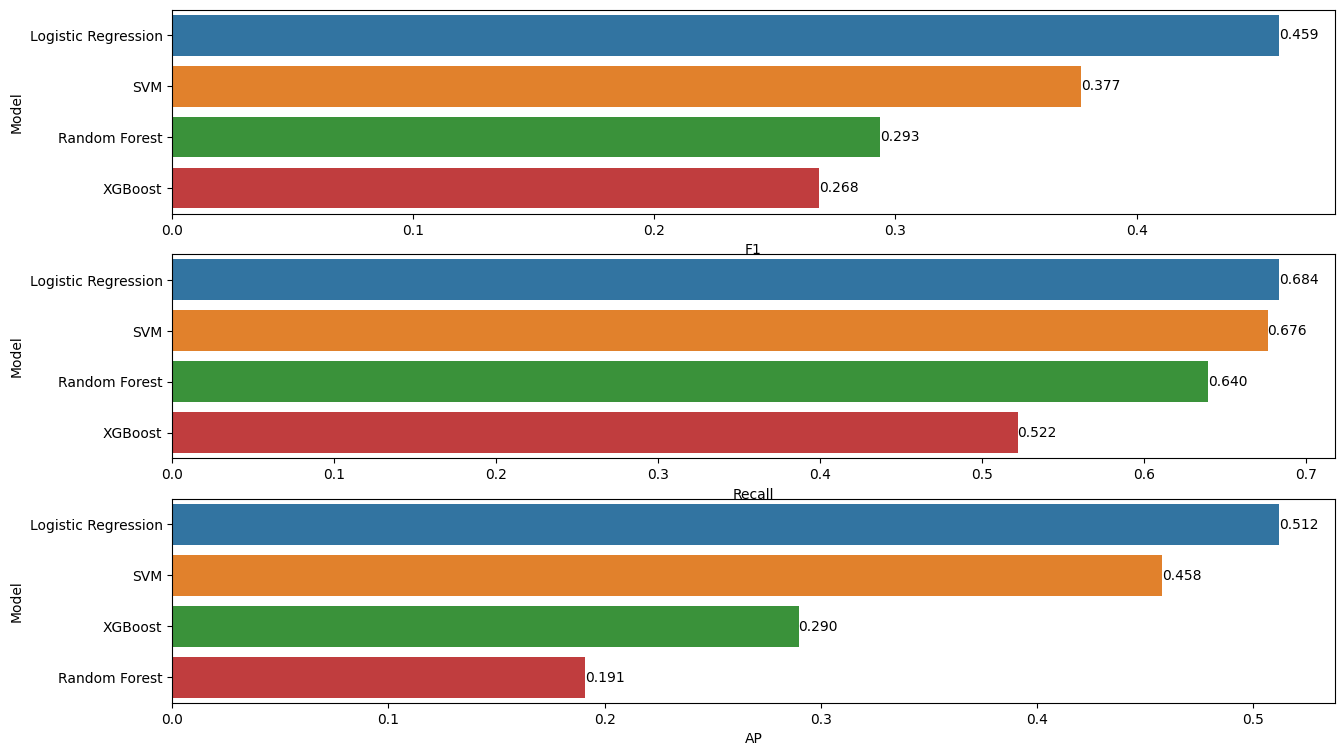

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,9))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.show();

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


col_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)
operations_final = [
    ("OneHotEncoder", col_trans_final),(
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    )
]

best_model = Pipeline(steps=operations_final)

In [5]:
best_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [7]:
X[X.Gender == "Male"].describe()
# We will make predictions on the model based on the average
# values of all male soldiers in our data.

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.00000,3899.000000,3899.000000,3899.000000,3899.000000,...,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,255.449090,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.004360,358.579636,275.632213,...,943.043344,238.560400,388.017440,1058.239805,858.714286,176.168761,848.762247,30.172352,70.122083,188.765324
std,37.295117,62.356906,17.281413,14.579399,58.714251,12.89351,10.329358,19.074837,34.511924,17.512428,...,111.463219,34.730231,29.360557,51.599179,141.506945,8.855214,41.138763,8.835481,2.922019,29.782236
min,163.000000,1194.000000,270.000000,156.000000,1106.000000,186.00000,156.000000,337.000000,246.000000,219.000000,...,648.000000,161.000000,293.000000,876.000000,393.000000,149.000000,695.000000,18.000000,60.000000,0.000000
25%,228.000000,1401.000000,324.000000,220.000000,1291.000000,244.00000,194.000000,403.000000,335.000000,263.000000,...,859.000000,212.000000,368.000000,1023.000000,760.000000,170.000000,820.000000,23.000000,68.000000,169.000000
50%,252.000000,1441.000000,335.000000,229.000000,1330.000000,252.00000,201.000000,415.000000,358.000000,275.000000,...,940.000000,235.000000,387.000000,1057.000000,849.000000,176.000000,848.000000,28.000000,70.000000,185.000000
75%,280.000000,1483.000000,347.000000,239.000000,1368.000000,261.00000,208.000000,428.000000,380.000000,288.000000,...,1018.000000,261.000000,407.000000,1092.000000,947.000000,182.000000,875.000000,36.500000,72.000000,209.000000
max,451.000000,1683.000000,393.000000,293.000000,1553.000000,306.00000,245.000000,489.000000,490.000000,334.000000,...,1379.000000,406.000000,494.000000,1245.000000,1442.000000,216.000000,1009.000000,58.000000,94.000000,321.000000


In [8]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
                                     ...     
Gender                                    NaN
Age                                 30.172352
Heightin                            70.122083
Weightlbs                          188.765324
WritingPreference                         NaN
Name: mean, Length: 98, dtype: object

In [9]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [10]:
pd.set_option("display.max_columns", 1000)

pd.DataFrame(male_mean_human).T


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Age,Heightin,Weightlbs,WritingPreference,SubjectsBirthLocation
mean,255.44909,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.00436,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.42652,1519.42216,289.786868,1060.496794,254.3901,1293.040267,847.637599,623.143114,356.354706,36.095153,64.17107,23.109772,244.823544,804.885099,101.893819,271.573993,349.57348,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.70813,199.760708,344.002052,72.564504,346.256732,379.948448,1063.41267,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.73942,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.5604,388.01744,1058.239805,858.714286,176.168761,848.762247,Male,30.172352,70.122083,188.765324,Right hand,California


In [11]:
best_model.predict(pd.DataFrame(male_mean_human).T)

# we can say that the average values of male soldiers are very
# close to Hispanic soldiers.

array(['White'], dtype=object)

In [14]:
from sklearn.metrics import matthews_corrcoef

y_pred = best_model.predict(x_test)
matthews_corrcoef(y_test, y_pred)


# Accuracy is an unreliable metric for unstable datasets. For this reason,
# matthews_corrcoef and cohen_kappa_score can be used for accuracy of
# imbalanced datasets.


0.683989424726695

In [13]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.6662410568628914

## SMOTE to balance the data

In [15]:
from imblearn.over_sampling import SMOTE

# equalizes or converges the majority class to the minority class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

# imblearn.pipeline is different from the pipeline library of the sklearn library.
# While the sklearn pipeline only runs the fit, transform, predict and predict_proba functions,
# imblearn.pipeline also runs the resample function.